In [2]:
#
#  File:
#    NUG_rectilinear_vector_PyNGL.py
#
#  Synopsis:
#    Illustrates creating vectors over contours over a map
#
#  Categories:
#    vector plots
#    contour plots
#
#  Author:
#    Karin Meier-Fleischer
#  
#  Date of initial publication:
#    June 2016
#
#  Description:
#    This example shows how to create vectors over contours over
#    a map using rectilinear data.
#
#  Effects illustrated:
#    o  Coloring vectors based on magnitude
#    o  Coloring vectors based on temperature
#    o  Drawing straight vectors
#    o  Drawing curly vectors
#    o  Zooming in on a map
# 
#  Output:
#    Two visualizations are produced: one over a global map and one over the United States
#
#  Notes: The data for this example can be downloaded from 
#    http://www.ncl.ucar.edu/Document/Manuals/NCL_User_Guide/Data/
#     
"""
  NCL User Guide Python Example:   NUG_rectilinear_vector_PyNGL.py
   - vectors on global map, colored
   - vectors colored by temperature
   - curly vectors
   - rectilinear data
  2015-06-04  kmf
"""
from __future__ import print_function
import Ngl,Nio,os

#--  define variables
diri   = "./"                               #-- data directory
fname  = "rectilinear_grid_2D.nc"           #-- data file name

#--  open file and read variables
f      = Nio.open_file(os.path.join(diri, fname), "r")    #-- open data file
temp   = f.variables["tsurf"][0,:,:]        #-- first time step
u      = f.variables["u10"][0,:,:]          #-- first time step
v      = f.variables["v10"][0,:,:]          #-- first time step
lat    = f.variables["lat"][:]              #-- all latitudes
lon    = f.variables["lon"][:]              #-- all longitudes

nlon   = len(lon)                           #-- number of longitudes
nlat   = len(lat)                           #-- number of latitudes

#-- open a workstation
wkres           =  Ngl.Resources()          #-- generate an resources object for workstation
wkres.wkWidth   =  2500                     #-- plot resolution 2500 pixel width
wkres.wkHeight  =  2500                     #-- plot resolution 2500 pixel height
wks_type        = "png"                     #-- graphics output type
wks_name        = "NUG_rectilinear_vector_PyNGL"
wks             =  Ngl.open_wks(wks_type,wks_name,wkres)

#-- create 1st plot: vectors on global map
res                           =  Ngl.Resources()

res.tiMainString              = "~F25~Wind velocity vectors"  #-- title string
res.tiMainFontHeightF         =  0.024                        #-- decrease title font size

res.mpLimitMode               = "Corners"                     #-- select a sub-region
res.mpLeftCornerLonF          =  float(lon[0])                #-- left longitude value
res.mpRightCornerLonF         =  float(lon[nlon-1])           #-- right longitude value
res.mpLeftCornerLatF          =  float(lat[0])                #-- left latitude value
res.mpRightCornerLatF         =  float(lat[nlat-1])           #-- right latitude value

res.mpPerimOn                 =  True                         #-- turn on map perimeter

res.vcMonoLineArrowColor      =  False                        #-- draw vectors in color
res.vcMinFracLengthF          =   0.33                        #-- increase length of vectors
res.vcMinMagnitudeF           =   0.001                       #-- increase length of vectors
res.vcRefLengthF              =   0.045                       #-- set reference vector length
res.vcRefMagnitudeF           =  20.0                         #-- set reference magnitude value
res.vcLineArrowThicknessF     =   6.0                         #-- make vector lines thicker (default: 1.0)
res.vcLevelPalette            = "ncl_default"                 #-- choose color map

res.pmLabelBarDisplayMode     = "Always"                      #-- turn on a labelbar
res.lbOrientation             = "Horizontal"                  #-- labelbar orientation
res.lbLabelFontHeightF        =  0.008                        #-- labelbar label font size
res.lbBoxMinorExtentF         =  0.22                         #-- decrease height of labelbar boxes

res.vfXArray                  =  lon[::3]                     #-- longitude values, subscript every 3rd value
res.vfYArray                  =  lat[::3]                     #-- latitude values, subscript every 3rd value

map1 = Ngl.vector_map(wks,u[::3,::3],v[::3,::3],res)           #-- draw a vector plot, subscript every 3rd value

#-- create 2nd plot: sub-region colored by temperature variable
tempa = (temp-273.15)*9.0/5.0+32.0                            #-- convert from Kelvin to Fahrenheit

res.mpLimitMode               = "LatLon"                      #-- change the area of the map
res.mpMinLatF                 =  18.0                         #-- minimum latitude
res.mpMaxLatF                 =  65.0                         #-- maximum latitude
res.mpMinLonF                 = -128.                         #-- minimum longitude
res.mpMaxLonF                 = -58.                          #-- minimum longitude

res.mpFillOn                  =  True                         #-- turn on map fill
res.mpLandFillColor           =  "gray45"                     #-- change land color to gray
res.mpOceanFillColor          =  "transparent"                #-- change color for oceans and inlandwater
res.mpInlandWaterFillColor    =  "transparent"                #-- set ocean/inlandwater color to transparent
res.mpGridMaskMode            = "MaskNotOcean"                #-- draw grid over ocean, not land
res.mpGridLineDashPattern     =   2                           #-- grid dash pattern
res.mpOutlineBoundarySets     = "GeophysicalAndUSStates"      #-- outline US States

res.vcFillArrowsOn            =  True                         #-- fill the vector arrows
res.vcMonoFillArrowFillColor  =  False                        #-- draw vectors with colors
res.vcFillArrowEdgeColor      =  "black"                      #-- draw the edges in black
res.vcLineArrowColor          =  "black"                      #-- draw the edges in black
res.vcGlyphStyle              = "CurlyVector"                 #-- draw nice curly vectors
res.vcLineArrowThicknessF     =   5.0                         #-- make vector lines thicker (default: 1.0)

res.tiMainString              = "~F25~Wind velocity vectors"  #-- title string

res.lbTitleString             = "TEMPERATURE (~S~o~N~F)"      #-- labelbar title string
res.lbTitleFontHeightF        =  0.010                        #-- labelbar title font size
res.lbBoxMinorExtentF         =  0.18                         #-- decrease height of labelbar boxes

res.vfXArray                  =  lon
res.vfYArray                  =  lat

map2 = Ngl.vector_scalar_map(wks,u,v,tempa,res)

#-- the end
Ngl.end()


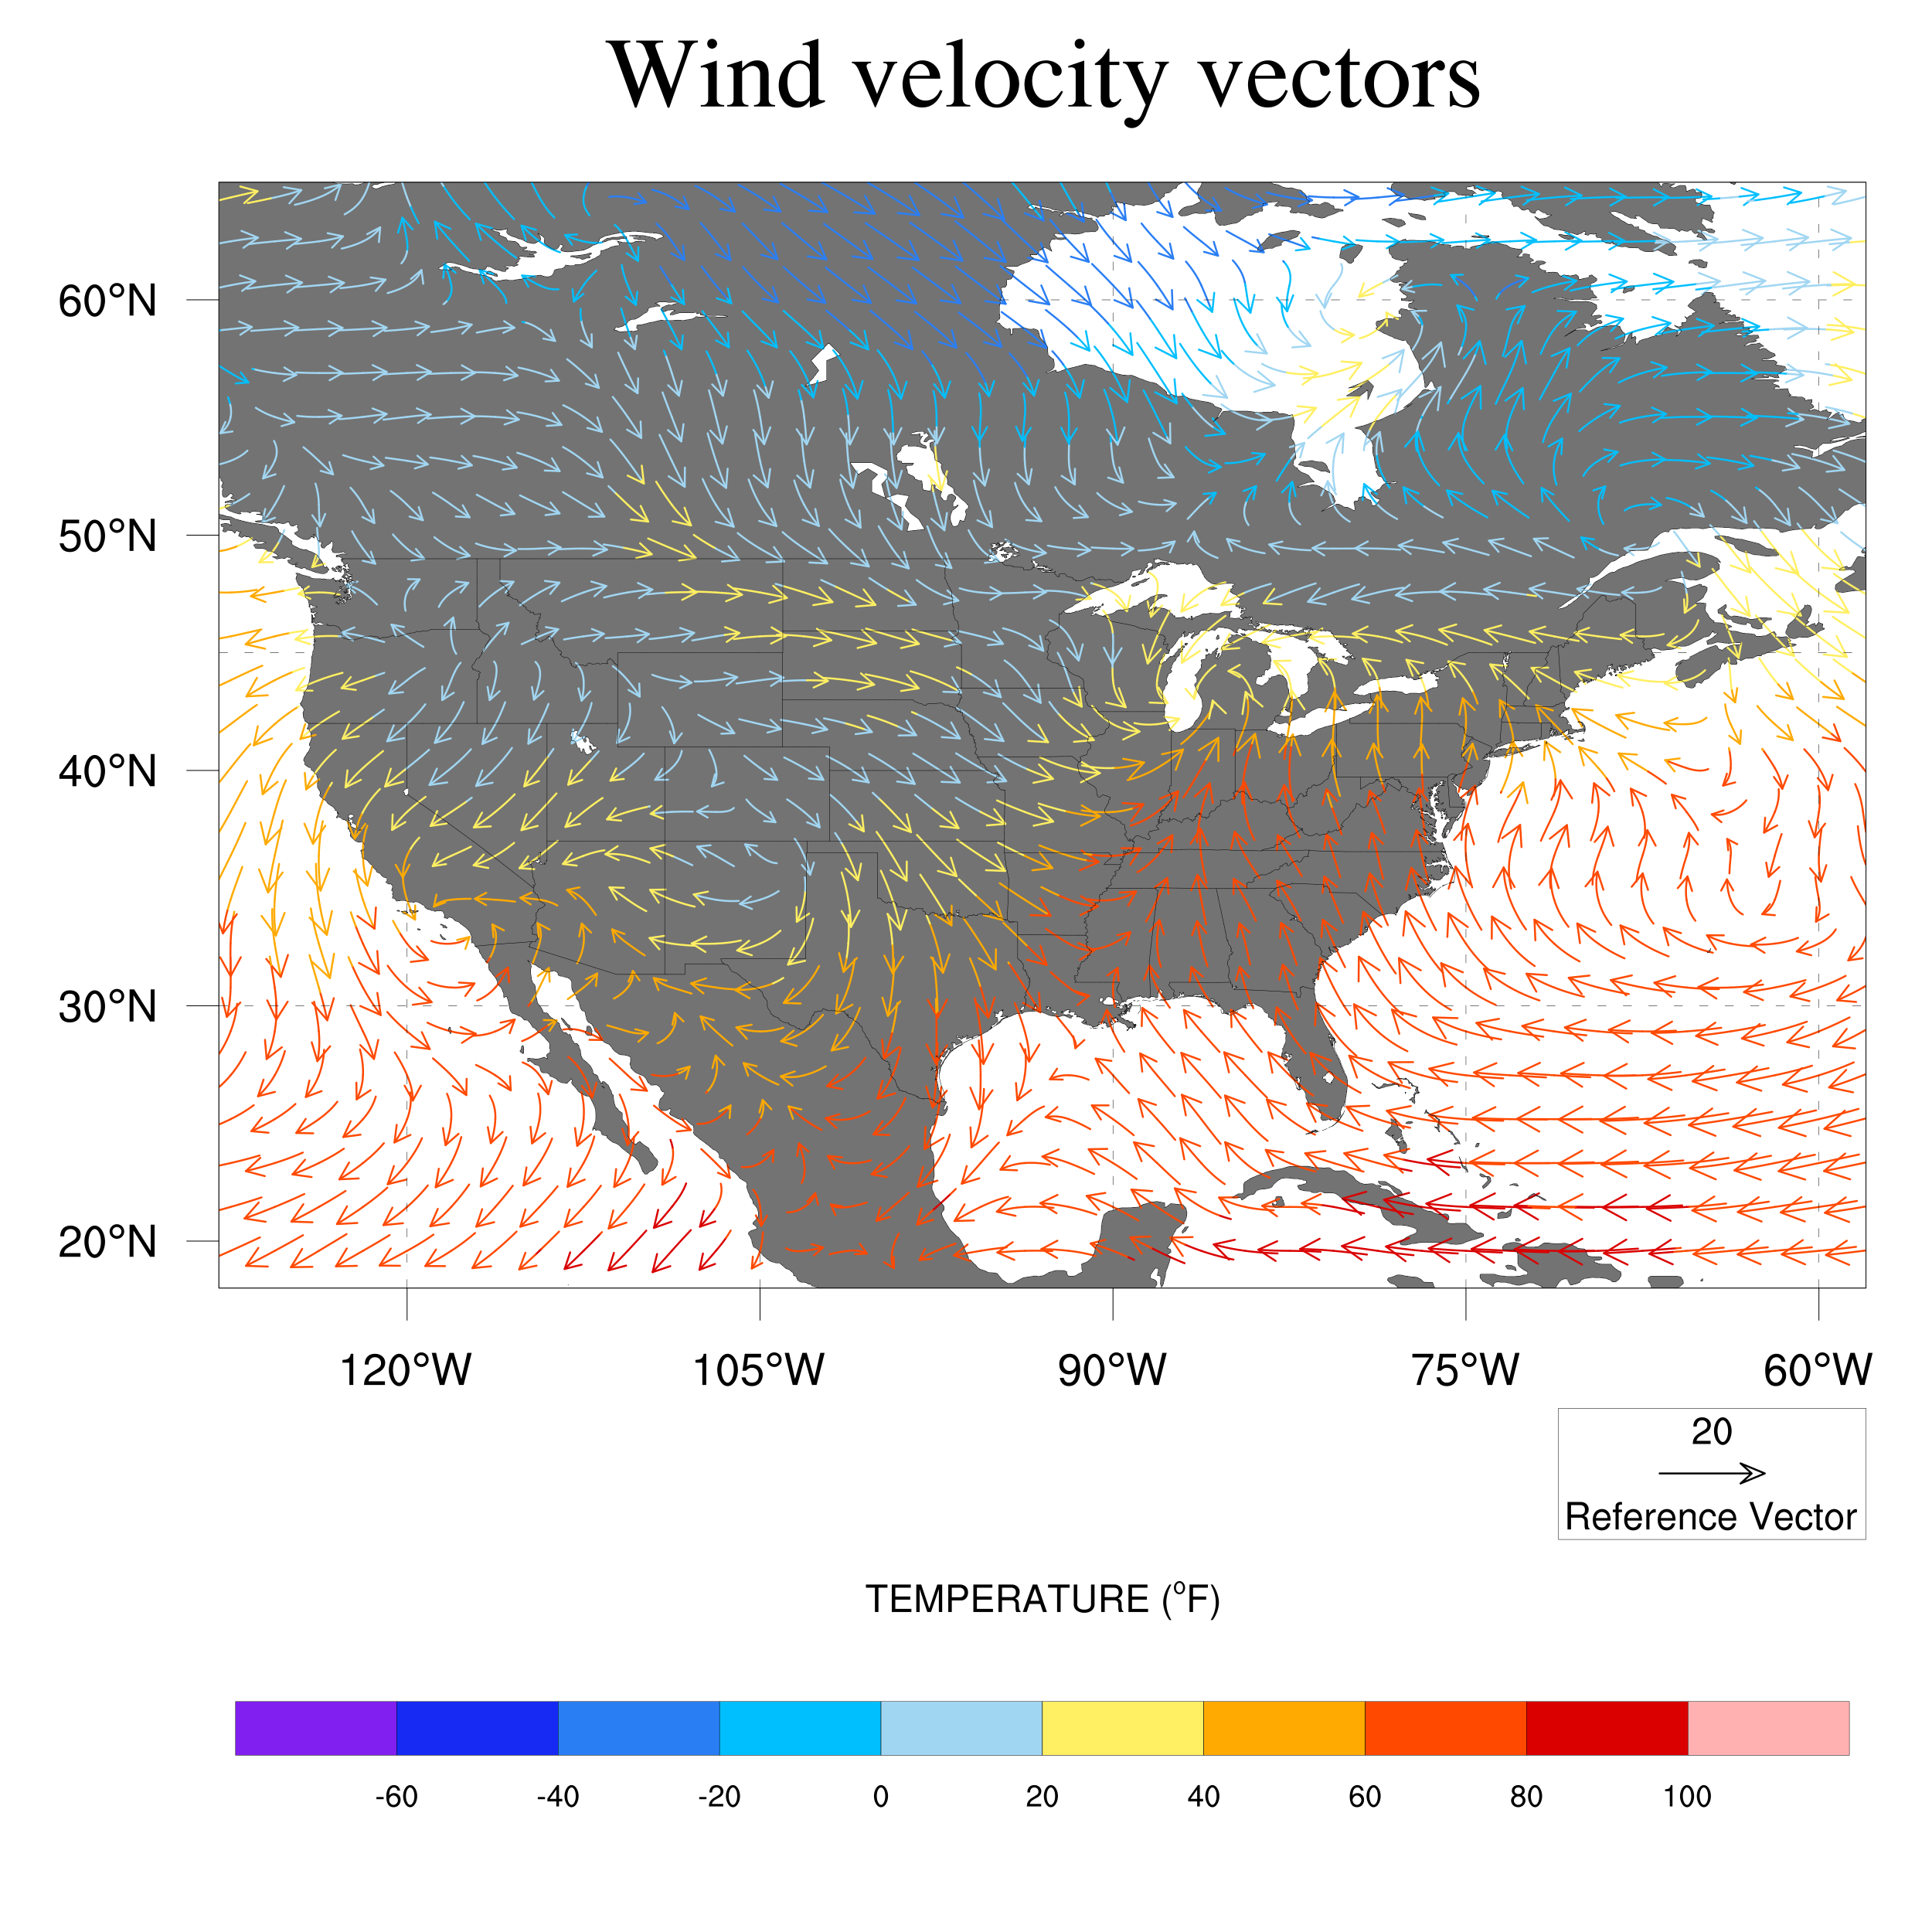